In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df_orders = pd.read_csv('C:/Users/EMMYRES-PC/Documents/orders.csv')
df_order_details = pd.read_csv('C:/Users/EMMYRES-PC/Documents/order_details.csv')
df_pizzas = pd.read_csv('C:/Users/EMMYRES-PC/Documents/pizzas.csv')
df_pizza_types = pd.read_csv('C:/Users/EMMYRES-PC/Documents/pizza_types.csv', encoding='latin1')


In [52]:
# Merge orders with order_details on 'order_id'
merged_df = pd.merge(df_orders, df_order_details, on='order_id', how='left')

# Merge result with pizzas on 'pizza_id'
merged_df = pd.merge(merged_df, df_pizzas, on='pizza_id', how='left')

# Merge result with pizza_types on 'pizza_type_id'
merged_df = pd.merge(merged_df, df_pizza_types, on='pizza_type_id', how='left')

merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


### PIZZA ANALYSIS


1. Total Revenue/Sales

In [54]:
total_revenue = (merged_df['price'] * merged_df['quantity']).sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


2. Total Quantity Sold

In [64]:
total_quantity = merged_df['quantity'].sum()
print("total quantity:", total_quantity)

total quantity: 49574


3. Total Orders

In [81]:
total_orders = merged_df['order_id'].nunique()
print("Total Unique Order:", total_orders)

Total Unique Order: 21350


4. Number Of Pizza Types Sold

In [82]:
pizza_types_count = merged_df['pizza_type_id'].nunique()
print("Number of Pizza Types:", pizza_types_count)

Number of Pizza Types: 32


5. Avearge Price Of The Pizzas

In [84]:
average_price = merged_df['price'].mean()
print(f"Average Pizza Price: ${average_price:.2f}")

Average Pizza Price: $16.49


6. Peak Hours Of Sales

In [86]:
# transform time to hour by quantity
merged_df['hour'] = merged_df['time'].dt.hour
sales_by_hour = merged_df.groupby('hour')['quantity'].sum()
print(sales_by_hour.sort_values(ascending=False).head())

hour
12    6776
13    6413
18    5417
17    5211
19    4406
Name: quantity, dtype: int64


VISUALIZATION

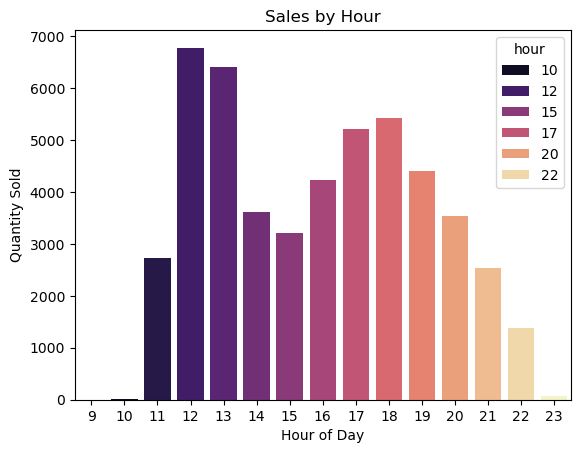

In [114]:
hourly_sales = merged_df.groupby('hour')['quantity'].sum().reset_index()
sns.barplot(x='hour', y='quantity', hue='hour', data=hourly_sales, palette="magma")
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Quantity Sold")
plt.show()

7. Total Sales By Day of The Week

In [95]:
merged_df['day_of_week'] = merged_df['date'].dt.day_name()
sales_by_day = merged_df.groupby('day_of_week')['quantity'].sum().sort_values(ascending=False)
print(sales_by_day)

best_day = sales_by_day.idxmax()
print("Best Sales Day:", best_day)

day_of_week
Friday       8242
Saturday     7493
Thursday     7478
Wednesday    6946
Tuesday      6895
Monday       6485
Sunday       6035
Name: quantity, dtype: int64
Best Sales Day: Friday


VISUALIZATION

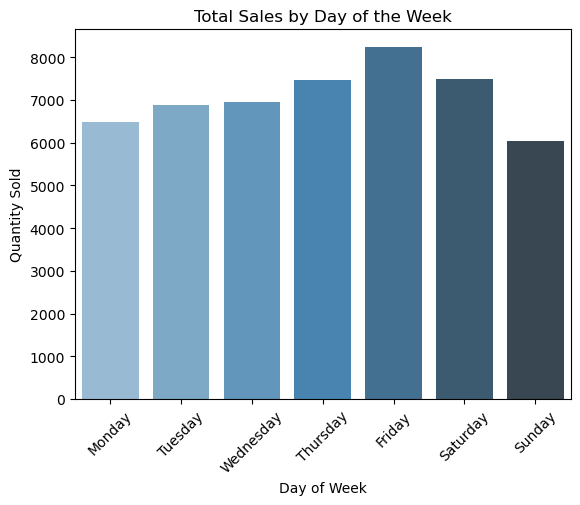

In [118]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = merged_df.groupby('day_of_week')['quantity'].sum().reindex(day_order).reset_index()

sns.barplot(x='day_of_week', y='quantity', hue='day_of_week', data=sales_by_day, palette="Blues_d")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

8. Top 5 BestSelling Pizzas

In [96]:
top_pizzas = merged_df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5)
print(top_pizzas)

pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64


VISUALIZATION

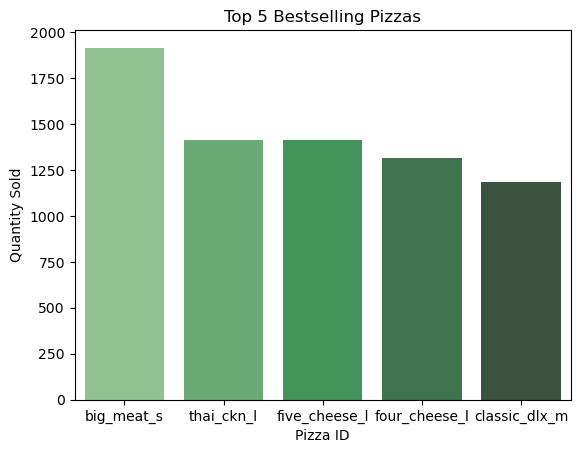

In [120]:
top_pizzas = merged_df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()

sns.barplot(x='pizza_id', y='quantity', hue='pizza_id', data=top_pizzas, palette="Greens_d")
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Pizza ID")
plt.ylabel("Quantity Sold")
plt.show()

9. Monthly Sales Trend

In [122]:
merged_df['month'] = merged_df['date'].dt.to_period('M')
monthly_sales = merged_df.groupby('month')['quantity'].sum()
print(monthly_sales)

month
2015-01    4232
2015-02    3961
2015-03    4261
2015-04    4151
2015-05    4328
2015-06    4107
2015-07    4392
2015-08    4168
2015-09    3890
2015-10    3883
2015-11    4266
2015-12    3935
Freq: M, Name: quantity, dtype: int64


VISUALIZATION

<Axes: title={'center': 'Monthly Pizza\xa0Sales\xa0Trend'}, xlabel='month'>

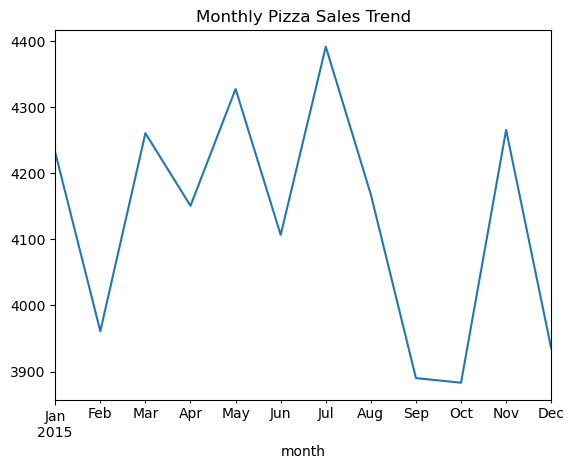

In [121]:
monthly_sales.plot(kind='line', title='Monthly Pizza Sales Trend')

10. Poorly Selling Pizza Types

In [98]:
sales_by_type = merged_df.groupby('pizza_type_id')['quantity'].sum().sort_values()
print(sales_by_type.head()) 

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64


VISUALIZATION

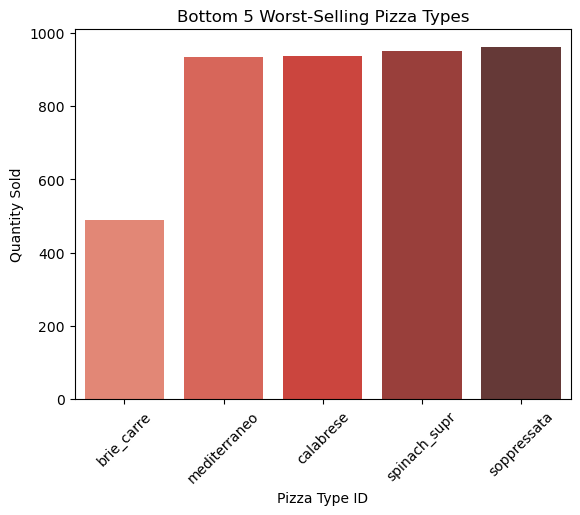

In [125]:
worst_pizzas = merged_df.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5).reset_index()

sns.barplot(x='pizza_type_id', y='quantity', hue='pizza_type_id', data=worst_pizzas, palette="Reds_d")
plt.title("Bottom 5 Worst-Selling Pizza Types")
plt.xlabel("Pizza Type ID")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()